<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_groupwise_(e_hat)_0_3_0_7_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.3_0.7'

In [4]:
os.listdir(base_path)

['data_groupwise_0.3_0.7_n20.csv',
 'data_groupwise_0.3_0.7_n30.csv',
 'data_groupwise_0.3_0.7_n60.csv',
 'data_groupwise_0.3_0.7_n120.csv',
 'data_groupwise_0.3_0.7_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.065836,20.476308,73.822173,0.149271,180.513588,180.340668,0.172920
1,0.0,1.0,61.521094,99.238196,63.001900,-0.569995,233.191196,233.504998,-0.313802
2,0.0,2.0,35.188924,22.489124,50.627582,0.382724,118.688355,118.678885,0.009470
3,0.0,3.0,92.053040,66.779307,24.416101,-0.253760,192.994687,193.025013,-0.030326
4,0.0,4.0,48.106614,78.222268,44.513677,-0.585770,180.256788,180.857269,-0.600481
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,65.526712,77.333725,21.337458,0.734046,174.931940,174.007559,0.924381
59996,999.0,56.0,79.197340,96.671027,83.378226,-0.472698,268.773895,269.096994,-0.323099
59997,999.0,57.0,69.623038,72.701126,68.505296,-0.963799,219.865661,220.683232,-0.817571
59998,999.0,58.0,89.483485,98.200437,44.397312,-0.413644,241.667590,241.720625,-0.053035


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.065836,20.476308,73.822173,0.149271,180.513588,180.340668,0.172920
1,0.0,1.0,61.521094,99.238196,63.001900,-0.569995,233.191196,233.504998,-0.313802
2,0.0,2.0,35.188924,22.489124,50.627582,0.382724,118.688355,118.678885,0.009470
3,0.0,3.0,92.053040,66.779307,24.416101,-0.253760,192.994687,193.025013,-0.030326
4,0.0,4.0,48.106614,78.222268,44.513677,-0.585770,180.256788,180.857269,-0.600481
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,65.526712,77.333725,21.337458,0.734046,174.931940,174.007559,0.924381
59996,999.0,56.0,79.197340,96.671027,83.378226,-0.472698,268.773895,269.096994,-0.323099
59997,999.0,57.0,69.623038,72.701126,68.505296,-0.963799,219.865661,220.683232,-0.817571
59998,999.0,58.0,89.483485,98.200437,44.397312,-0.413644,241.667590,241.720625,-0.053035


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.065836  20.476308  73.822173  ...  180.513588  180.340668  0.172920
      1.0    61.521094  99.238196  63.001900  ...  233.191196  233.504998 -0.313802
      2.0    35.188924  22.489124  50.627582  ...  118.688355  118.678885  0.009470
      3.0    92.053040  66.779307  24.416101  ...  192.994687  193.025013 -0.030326
      4.0    48.106614  78.222268  44.513677  ...  180.256788  180.857269 -0.600481
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   65.526712  77.333725  21.337458  ...  174.931940  174.007559  0.924381
      56.0   79.197340  96.671027  83.378226  ...  268.773895  269.096994 -0.323099
      57.0   69.623038  72.701126  68.505296  ...  219.865661  220.683232 -0.817571
      58.0   89.483485  98.200437  44.397312  ...  241.667590  241.720625 -0.053035
      59.0   41.209662  72.582451  92.242060  ...  217.602554  216.289642  1.312912

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.065836  20.476308  73.822173  ...  180.513588  180.340668  0.172920
      1.0    61.521094  99.238196  63.001900  ...  233.191196  233.504998 -0.313802
      2.0    35.188924  22.489124  50.627582  ...  118.688355  118.678885  0.009470
      3.0    92.053040  66.779307  24.416101  ...  192.994687  193.025013 -0.030326
      4.0    48.106614  78.222268  44.513677  ...  180.256788  180.857269 -0.600481
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   65.526712  77.333725  21.337458  ...  174.931940  174.007559  0.924381
      56.0   79.197340  96.671027  83.378226  ...  268.773895  269.096994 -0.323099
      57.0   69.623038  72.701126  68.505296  ...  219.865661  220.683232 -0.817571
      58.0   89.483485  98.200437  44.397312  ...  241.667590  241.720625 -0.053035
      59.0   41.209662  72.582451  92.242060  ...  217.602554  216.289642  1.312912

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.065836,20.476308,73.822173,0.149271,180.513588,180.340668,0.172920
1,0.0,1.0,61.521094,99.238196,63.001900,-0.569995,233.191196,233.504998,-0.313802
2,0.0,2.0,35.188924,22.489124,50.627582,0.382724,118.688355,118.678885,0.009470
3,0.0,3.0,92.053040,66.779307,24.416101,-0.253760,192.994687,193.025013,-0.030326
4,0.0,4.0,48.106614,78.222268,44.513677,-0.585770,180.256788,180.857269,-0.600481
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,65.526712,77.333725,21.337458,0.734046,174.931940,174.007559,0.924381
59996,999.0,56.0,79.197340,96.671027,83.378226,-0.472698,268.773895,269.096994,-0.323099
59997,999.0,57.0,69.623038,72.701126,68.505296,-0.963799,219.865661,220.683232,-0.817571
59998,999.0,58.0,89.483485,98.200437,44.397312,-0.413644,241.667590,241.720625,-0.053035


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.065836  20.476308  73.822173  ...  180.513588  180.340668  0.172920
      1.0    61.521094  99.238196  63.001900  ...  233.191196  233.504998 -0.313802
      2.0    35.188924  22.489124  50.627582  ...  118.688355  118.678885  0.009470
      3.0    92.053040  66.779307  24.416101  ...  192.994687  193.025013 -0.030326
      4.0    48.106614  78.222268  44.513677  ...  180.256788  180.857269 -0.600481
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   65.526712  77.333725  21.337458  ...  174.931940  174.007559  0.924381
      56.0   79.197340  96.671027  83.378226  ...  268.773895  269.096994 -0.323099
      57.0   69.623038  72.701126  68.505296  ...  219.865661  220.683232 -0.817571
      58.0   89.483485  98.200437  44.397312  ...  241.667590  241.720625 -0.053035
      59.0   41.209662  72.582451  92.242060  ...  217.602554  216.289642  1.312912

[60000 rows x 7 columns]

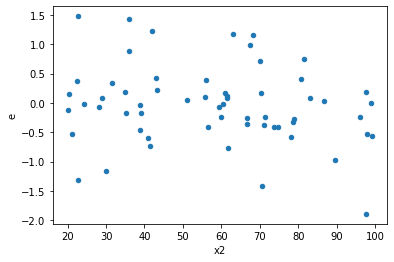

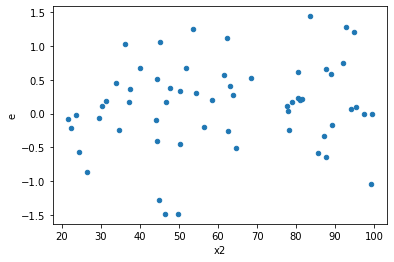

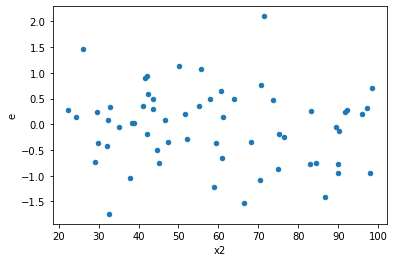

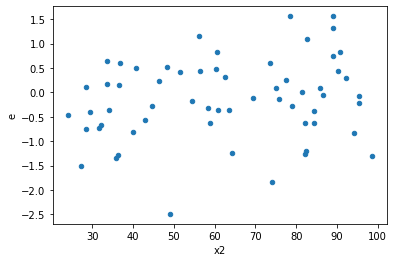

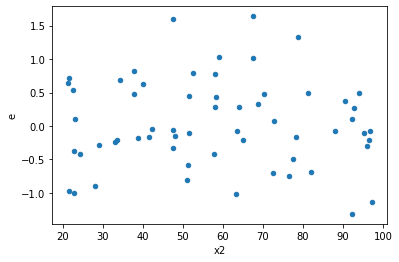

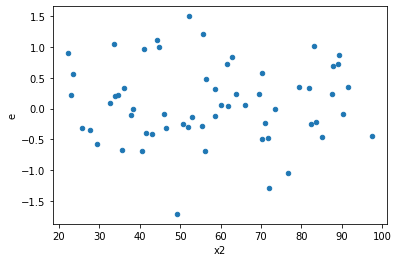

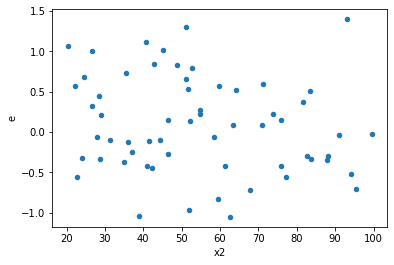

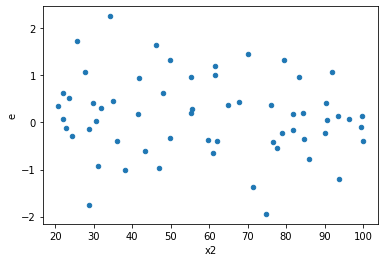

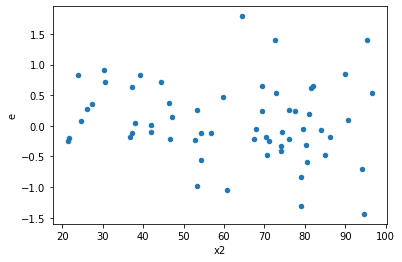

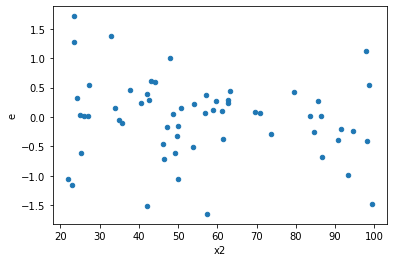

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('e_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,4.0940695063954875,4.126797857564749,0.1949556907807375,0.19651418369355947,1.0079940878185227,0.9856164471508304,0.5071917764245848,0.4928082235754152,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,2.890186848329668,4.232345531511646,0.13762794515855564,0.20154026340531647,1.4643847452138445,0.38919734637462744,0.8054013268126863,0.19459867318731372,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,2.4009239873039165,3.144854436216901,0.11432971368113888,0.14975497315318576,1.3098517291038316,0.5417148302028909,0.7291425848985545,0.27085741510144545,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,1.488622047567481,2.2498564970932557,0.07088676416988005,0.10713602367110742,1.511368517461963,0.3513929511166958,0.8243035244416521,0.1756964755583479,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,5.624374981620437,6.111282319469925,0.26782738007716367,0.2910134437842822,1.0865709237809755,0.8509070989293317,0.5745464505353342,0.42545354946466585,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,1.715520061163984,3.949457973089909,0.08169143148399924,0.18806942728999565,2.302192823329733,0.06260222325356102,0.9686988883732195,0.03130111162678051,Reject001=1 : Homoscedasticity
13.0,21.0,21.0,2.314254683926025,4.268545088986573,0.11020260399647738,0.20326405185650348,1.844457793964658,0.16893676204682473,0.9155316189765876,0.08446838102341236,Reject001=1 : Homoscedasticity
14.0,21.0,21.0,1.9331031651606314,10.938938757915132,0.09205253167431578,0.5209018456150063,5.658745459146854,0.0002026554429019889,0.999898672278549,0.00010132772145099445,Reject001=0 : Heteroscedasticity
15.0,21.0,21.0,4.01604625424299,5.219856890139424,0.19124029782109478,0.24856461381616307,1.299750192026448,0.5533357535466799,0.7233321232266601,0.2766678767733399,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,4.0940695063954875,4.126797857564749,0.1949556907807375,0.19651418369355947,1.0079940878185227,0.9856164471508304,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,4.129782652064937,1.7271641597734495,0.19665631676499698,0.08224591237016426,0.41822156401132843,0.05187484446740971,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,2.890186848329668,4.232345531511646,0.13762794515855564,0.20154026340531647,1.4643847452138445,0.38919734637462744,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,5.658793835713861,2.8127326056831183,0.2694663731292315,0.1339396478896723,0.49705514767676456,0.11704659190432952,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,2.4009239873039165,3.144854436216901,0.11432971368113888,0.14975497315318576,1.3098517291038316,0.5417148302028909,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,3.317609166827685,2.455479957679418,0.15798138889655644,0.11692761703235324,0.7401353909409891,0.4964542192407837,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,1.488622047567481,2.2498564970932557,0.07088676416988005,0.10713602367110742,1.511368517461963,0.3513929511166958,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,5.624374981620437,6.111282319469925,0.26782738007716367,0.2910134437842822,1.0865709237809755,0.8509070989293317,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,1.715520061163984,3.949457973089909,0.08169143148399924,0.18806942728999565,2.302192823329733,0.06260222325356102,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      941
Reject001=0 : Heteroscedasticity     59
Name: Result_test, dtype: int64